<a href="https://colab.research.google.com/github/bawejahritik/NeuralNetworksZeroToHero-Andrej-Karpathy-/blob/main/MakeMore1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bigram

In [1]:
words = open("/content/drive/MyDrive/names.txt", "r").read().splitlines()

In [2]:
words[:20]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
b = {}

for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = 1 + b.get(bigram, 0)

In [7]:
sorted(b.items(), key = lambda kv : -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [8]:
import torch

In [9]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [10]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0

In [11]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1,ix2] += 1

In [12]:
itos  = {i:s for s, i in stoi.items()}

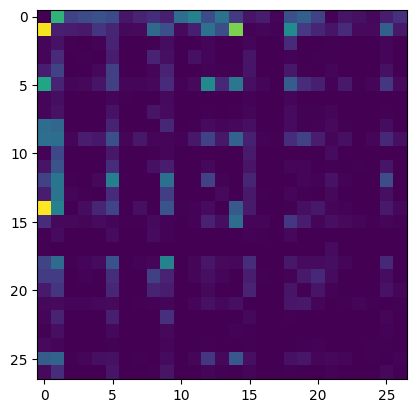

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [14]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [15]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [16]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()

itos[ix]

'j'

In [17]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [18]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [19]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [20]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(5):
  ix = 0
  out = []
  while True:
    # p = N[ix].float()
    # p = p/p.sum()
    p = P[ix]
    # p = torch.ones(27)/27.0
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break

  print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [21]:
log_likelihood = 0.0
n = 0
# for w in words:
for w in ["hritikq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    print(f'{ch1}{ch2}: {prob:.4f} {logprob: .4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.h: 0.0273 -3.6011
hr: 0.0268 -3.6185
ri: 0.2384 -1.4338
it: 0.0306 -3.4876
ti: 0.0952 -2.3515
ik: 0.0252 -3.6826
kq: 0.0002 -8.5305
q.: 0.0970 -2.3331
log_likelihood=tensor(-29.0389)
nll=tensor(29.0389)
3.6298563480377197


In [22]:
#create the training set of bigrams

xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)



In [23]:
xs

tensor([ 0,  5, 13, 13,  1])

In [24]:
ys

tensor([ 5, 13, 13,  1,  0])

In [31]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
xenc


tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [32]:
xenc.shape

torch.Size([5, 27])

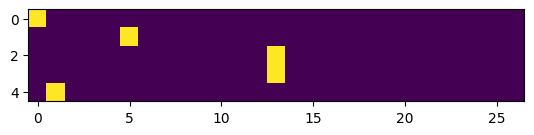

In [33]:
plt.imshow(xenc)

In [34]:
xenc.dtype

torch.float32

In [37]:
W = torch.randn((27, 27))
xenc @ W

tensor([[ 0.2571, -1.4248,  0.3898,  1.3996, -0.6054, -0.4875, -0.6445,  0.4865,
          0.9471,  0.0614,  0.1972, -1.2904, -0.2716,  0.5421,  1.0792, -0.4112,
         -1.3406, -0.2083,  0.6496, -1.0986,  0.2563,  0.0493,  0.9053,  0.2763,
          1.9167, -0.5910,  0.4935],
        [ 0.5909,  1.2148, -0.6175,  0.8579, -0.3284,  2.3392, -0.2468, -1.1875,
         -0.5762,  0.0263,  0.1776,  0.7640,  0.1072,  1.4085, -1.3891,  0.4117,
          0.3970,  0.3763, -1.6224, -1.7793,  1.1596,  0.5663, -0.5101, -1.1671,
          0.7164,  1.0483,  1.6076],
        [-0.4668, -1.5337, -1.5680, -0.7528, -0.4426, -0.2021,  0.7662, -0.0676,
          0.1677,  0.3435,  0.6388, -0.5237, -0.6138,  1.1530, -0.6249,  0.1624,
         -0.3148,  1.5244,  0.1696, -0.4085,  0.5933, -0.6910, -0.3628,  1.4216,
         -0.7350,  1.5113, -0.1910],
        [-0.4668, -1.5337, -1.5680, -0.7528, -0.4426, -0.2021,  0.7662, -0.0676,
          0.1677,  0.3435,  0.6388, -0.5237, -0.6138,  1.1530, -0.6249,  0.1624

In [41]:
logits = (xenc @ W)
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0323, 0.0060, 0.0369, 0.1012, 0.0136, 0.0153, 0.0131, 0.0406, 0.0644,
         0.0266, 0.0304, 0.0069, 0.0190, 0.0429, 0.0735, 0.0166, 0.0065, 0.0203,
         0.0478, 0.0083, 0.0323, 0.0262, 0.0618, 0.0329, 0.1698, 0.0138, 0.0409],
        [0.0353, 0.0658, 0.0105, 0.0461, 0.0141, 0.2026, 0.0153, 0.0060, 0.0110,
         0.0200, 0.0233, 0.0419, 0.0217, 0.0799, 0.0049, 0.0295, 0.0290, 0.0285,
         0.0039, 0.0033, 0.0623, 0.0344, 0.0117, 0.0061, 0.0400, 0.0557, 0.0975],
        [0.0171, 0.0059, 0.0057, 0.0128, 0.0175, 0.0222, 0.0586, 0.0254, 0.0322,
         0.0384, 0.0516, 0.0161, 0.0147, 0.0862, 0.0146, 0.0320, 0.0199, 0.1250,
         0.0323, 0.0181, 0.0493, 0.0136, 0.0189, 0.1128, 0.0131, 0.1234, 0.0225],
        [0.0171, 0.0059, 0.0057, 0.0128, 0.0175, 0.0222, 0.0586, 0.0254, 0.0322,
         0.0384, 0.0516, 0.0161, 0.0147, 0.0862, 0.0146, 0.0320, 0.0199, 0.1250,
         0.0323, 0.0181, 0.0493, 0.0136, 0.0189, 0.1128, 0.0131, 0.1234, 0.0225],
        [0.0173, 0.0228,

In [43]:
probs[0].sum()

tensor(1.0000)

In [44]:
probs.shape


torch.Size([5, 27])

Summary

In [45]:
xs

tensor([ 0,  5, 13, 13,  1])

In [46]:
ys

tensor([ 5, 13, 13,  1,  0])

In [61]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [62]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
# softmax
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)

In [63]:
probs.shape

torch.Size([5, 27])

In [64]:
nlls = torch.zeros(5)
for i in range(5):
  x = xs[i].item()
  y = ys[i].item()
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
  print('input to the neural net: ', x)
  print('output probabilities from the neural net: ', probs[i])
  print('label (actual next character): ', y)
  p = probs[i, y]
  print('probability assigned by the net to the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood: ', logp.item())
  nll = -logp
  print('negative log likelihood: ', nll.item())
  nlls[i] = nll

print('==========')
print('average negative log likelihood, i.e., loss = ', nlls.mean().item())

--------
bigram example 1: .e (indexes 0, 5)
input to the neural net:  0
output probabilities from the neural net:  tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character):  5
probability assigned by the net to the correct character: 0.01228625513613224
log likelihood:  -4.399273872375488
negative log likelihood:  4.399273872375488
--------
bigram example 2: em (indexes 5, 13)
input to the neural net:  5
output probabilities from the neural net:  tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character):  13
probability assigned by the net to the correct character: 

Optimizatin

In [65]:
xs

tensor([ 0,  5, 13, 13,  1])

In [66]:
ys

tensor([ 5, 13, 13,  1,  0])

In [75]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [89]:
# Forward Pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
# softmax
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
loss = -probs[torch.arange(5), ys].log().mean()

In [90]:
probs.shape

torch.Size([5, 27])

In [91]:
print(loss.item())

3.7291626930236816


In [92]:
#backward pass
W.grad = None
loss.backward()

In [93]:
W.data += -0.1*W.grad

Final code

In [103]:
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [105]:
for k in range(100):
  xenc = F.one_hot(xs, num_classes=27).float()
  logits = xenc @ W
  counts = logits.exp()
  probs = counts / counts.sum(1, keepdims=True)
  loss = -probs[torch.arange(num), ys].log().mean()
  print(loss.item())

  W.grad = None
  loss.backward()

  W.data += -50*W.grad

2.4726526737213135
2.4724340438842773
2.4722204208374023
2.472010850906372
2.471806049346924
2.4716053009033203
2.471409320831299
2.4712166786193848
2.4710280895233154
2.4708433151245117
2.4706623554229736
2.4704854488372803
2.4703118801116943
2.4701414108276367
2.4699742794036865
2.4698104858398438
2.46964955329895
2.469492197036743
2.4693377017974854
2.4691860675811768
2.469036817550659
2.468891143798828
2.468747615814209
2.46860671043396
2.468468427658081
2.468332529067993
2.4681990146636963
2.4680681228637695
2.4679393768310547
2.4678127765655518
2.467688798904419
2.4675662517547607
2.4674463272094727
2.4673283100128174
2.467212438583374
2.467097759246826
2.4669857025146484
2.4668753147125244
2.466766834259033
2.4666595458984375
2.4665544033050537
2.466451406478882
2.4663491249084473
2.4662492275238037
2.4661502838134766
2.4660532474517822
2.4659576416015625
2.4658634662628174
2.4657704830169678
2.465679407119751
2.4655895233154297
2.465500593185425
2.4654135704040527
2.46532726287